# Visualização e Análise de Dados

In [ ]:
!pip install pandas matplotlib seaborn pandas-datareader

## Mercado financeiro

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
import pandas_datareader.data as pdr
from datetime import datetime, timedelta

end_date = datetime.now()
start_date = end_date - timedelta(days=365)

df_goog = pdr.DataReader('GOOG', 'google', start_date, end_date)
df_goog.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-08-09,920.61,925.98,917.25,922.90,1192081
2017-08-10,917.55,919.26,906.13,907.24,1823967
2017-08-11,907.97,917.78,905.58,914.39,1206782
2017-08-14,922.53,924.67,918.19,922.67,1064530
2017-08-15,924.23,926.55,919.82,922.22,881944


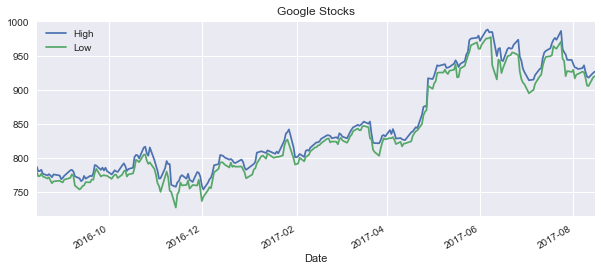

In [5]:
df_goog[['High', 'Low']].plot(figsize=(10, 4), title='Google Stocks', grid=True)

In [6]:
df_goog['MovingMean14'] = df_goog.Close.rolling(14).mean()  # Média movel de 14 dias do Fechamento
df_goog['MovingMean30'] = df_goog.Close.rolling(30).mean()  # Média movel de 30 dias do Fechamento
df_goog['DailyReturn'] = df_goog.Close.pct_change()              # Retorno diario percentual
df_goog.tail()

,Open,High,Low,Close,Volume,MovingMean14,MovingMean30,DailyReturn
Date,,,,,,,,
2017-08-09,920.61,925.98,917.25,922.90,1192081,939.268571,937.206333,-0.004197
2017-08-10,917.55,919.26,906.13,907.24,1823967,934.577143,936.098000,-0.016968
2017-08-11,907.97,917.78,905.58,914.39,1206782,929.866429,935.984667,0.007881
2017-08-14,922.53,924.67,918.19,922.67,1064530,927.864286,936.449333,0.009055
2017-08-15,924.23,926.55,919.82,922.22,881944,926.037143,937.233333,-0.000488


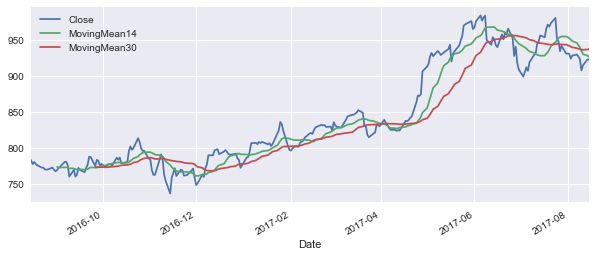

In [7]:
columns = ['Close','MovingMean14', 'MovingMean30']
graph = df_goog[columns].plot(figsize=(10, 4), grid=True)

In [8]:
graph.figure.savefig('graph.png')

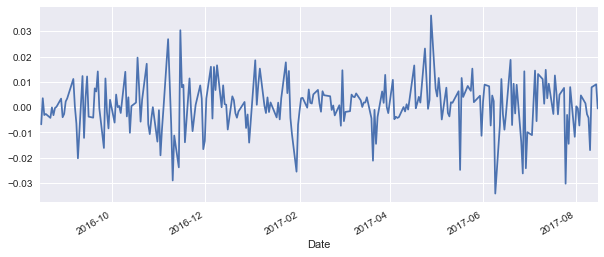

In [9]:
df_goog.DailyReturn.plot(figsize=(10, 4), grid=True)

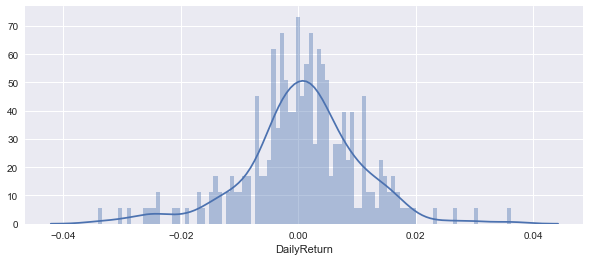

In [10]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 4))
sns.distplot(df_goog.DailyReturn.dropna(), bins=100, ax=ax1)

In [11]:
fig.savefig('graph2.png')

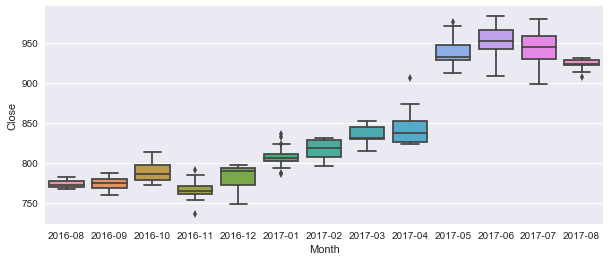

In [12]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 4))
df_goog['Month'] = df_goog.index.to_period('M')
sns.boxplot('Month', 'Close', data=df_goog, ax=ax1)

In [13]:
import matplotlib.dates as mdates

df_goog.reset_index(inplace=True)
df_goog['DateAsNumber'] = df_goog.Date.apply(mdates.date2num)

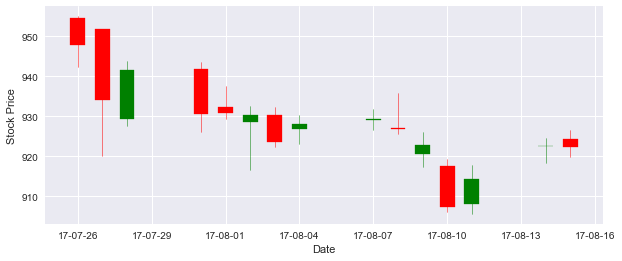

In [14]:
from matplotlib.finance import candlestick_ohlc

def plot_candle_stick(df):
    fig, ax1 = plt.subplots(1, 1, figsize=(10, 4))
    candlestick_ohlc(ax1, df.values, width=.6, colorup='g', colordown='r')
    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price')
    
columns = ['DateAsNumber', 'Open', 'High', 'Low', 'Close', 'Volume']
plot_candle_stick(df_goog[columns].tail(15))

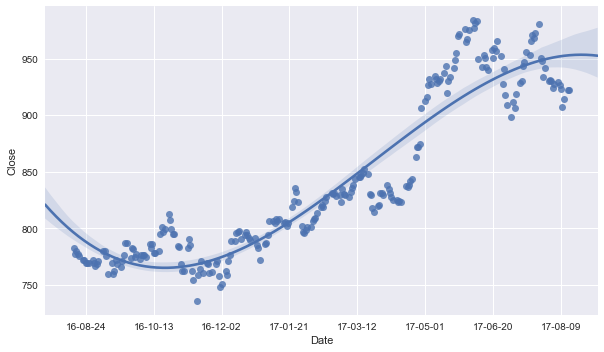

In [15]:
lm = sns.lmplot('DateAsNumber', 'Close', data=df_goog, aspect=1.7, order=3)
lm.ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
lm.ax.set_xlabel('Date')

In [16]:
lm.fig.savefig('graph3.png')

#### Múltiplas ações

In [17]:
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)

stock_names = ['GOOG', 'MSFT', 'AMZN', 'AAPL','TSLA', 'XOM', 'GE', 'EBAY']
df_stocks = pdr.DataReader(stock_names, 'google', start_date, end_date)
df_stocks.Close.tail()

,AAPL,AMZN,EBAY,GE,GOOG,MSFT,TSLA,XOM
Date,,,,,,,,
2017-08-09,161.06,982.01,36.08,25.71,922.90,72.47,363.53,80.21
2017-08-10,155.32,956.92,34.99,25.30,907.24,71.41,355.40,78.97
2017-08-11,157.48,967.99,35.05,25.20,914.39,72.50,357.87,78.21
2017-08-14,159.85,983.30,35.20,25.36,922.67,73.59,363.80,78.23
2017-08-15,161.60,982.74,35.25,25.14,922.22,73.22,362.33,78.04


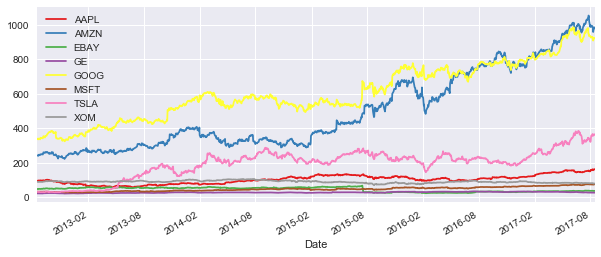

In [18]:
df_stocks.Close.plot(figsize=(10, 4), grid=True, colormap='Set1')

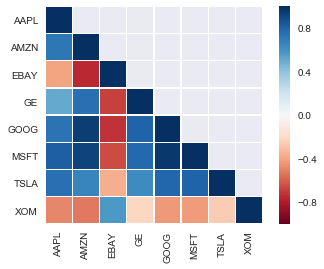

In [19]:
def plot_corr(corr):
    # Vamos cortar a metade de cima pois é o espelho da metade de baixo
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask, 1)] = True

    sns.heatmap(corr, mask=mask, cmap='RdBu', square=True, linewidths=.5)

corr = df_stocks.Close.corr()  # Calculando a correlacao
plot_corr(corr)

## Titanic

In [40]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund...,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cuming...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikki...,female,26.0,0,0,STON/O...,7.9250,NaN,S
3,4,1,1,Futrel...,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen,...",male,35.0,0,0,373450,8.0500,NaN,S


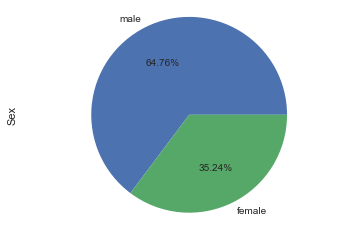

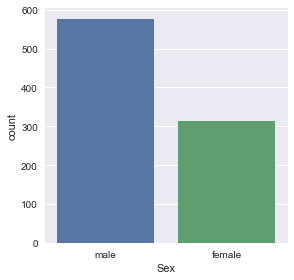

In [21]:
df.Sex.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')  # Para deixar o gráfico perfeitamente redondo

sns.factorplot('Sex', data=df, kind='count')

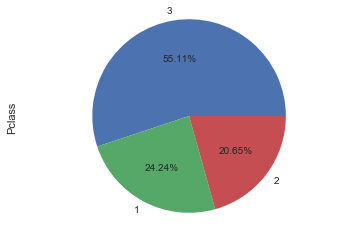

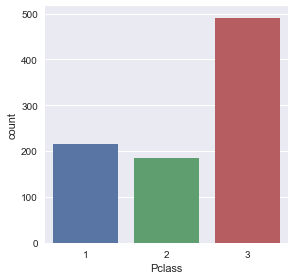

In [22]:
df.Pclass.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal');

sns.factorplot('Pclass',data=df, kind='count')

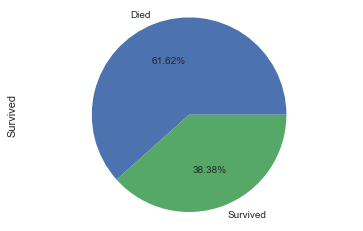

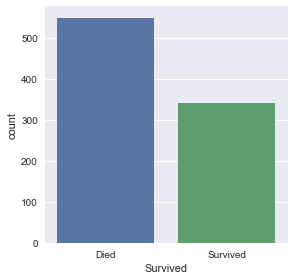

In [23]:
# Para trocar os valores numéricos pelos nomes nos gráficos
survived_map = {0: 'Died', 1: 'Survived'} 

df.Survived.map(survived_map).value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal');

sns.factorplot('Survived',data=df, kind='count').set_xticklabels(survived_map.values())

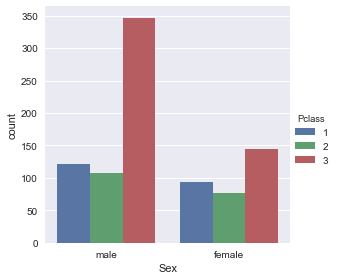

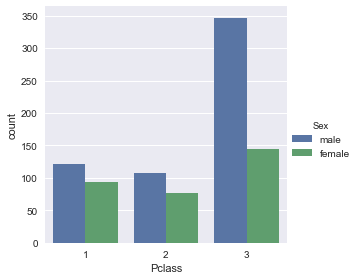

In [24]:
# Distribuição do sexo dividido por classe.
sns.factorplot('Sex', data=df, hue='Pclass', kind='count')
# Distribuição da classe dividida por sexo.
sns.factorplot('Pclass', data=df, hue='Sex', kind='count')

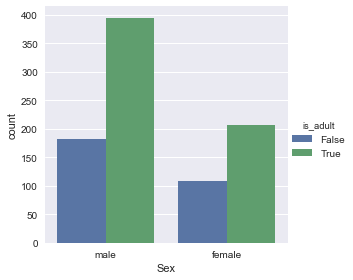

In [25]:
df['is_adult'] = df.Age.apply(lambda age: age >= 18)
sns.factorplot('Sex', data=df, hue='is_adult', kind='count')

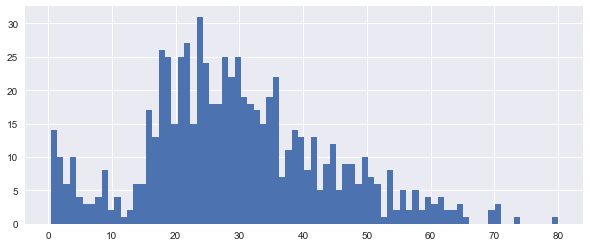

In [26]:
df.Age.hist(bins=int(df.Age.max()), figsize=(10, 4))

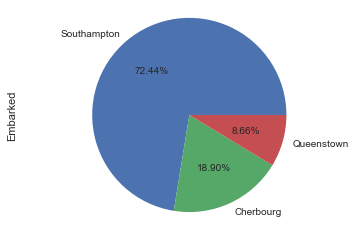

In [27]:
city_map = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}

df.Embarked.map(city_map).value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal');

(-1.1010836917279376,
 1.1000516043679971,
 -1.1103714108698637,
 1.1094824717885967)

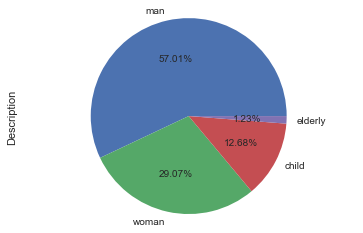

In [28]:
def get_description(row):
    if row.Age < 18:
        return 'child'
    elif row.Age >= 65:
        return 'elderly'
    return 'man' if row.Sex == 'male' else 'woman'

df['Description'] = df.apply(get_description, axis=1)
df.Description.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')

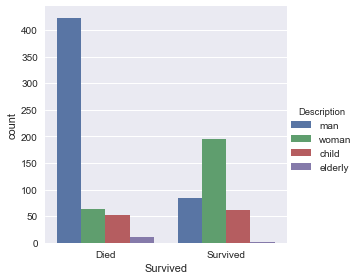

In [29]:
sns.factorplot('Survived', data=df, hue='Description', kind='count').set_xticklabels(survived_map.values())

(-1.1129957375576855,
 1.100618844645604,
 -1.118648646102008,
 1.1139463270377732)

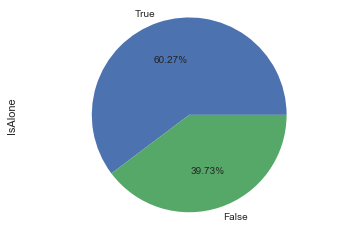

In [30]:
# Coluna membros da família = irmãos/parceiros + país/filhos.
df['FamilyMember'] = df.SibSp + df.Parch
# Coluna dizendo se a pessoa está sozinho ou não.
df['IsAlone'] = df.FamilyMember == 0

df.IsAlone.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')

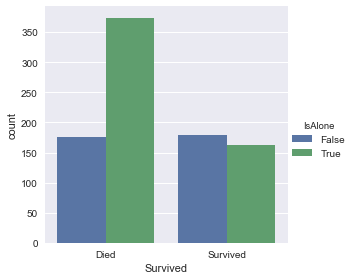

In [31]:
sns.factorplot('Survived', data=df, hue='IsAlone', kind='count').set_xticklabels(survived_map.values())

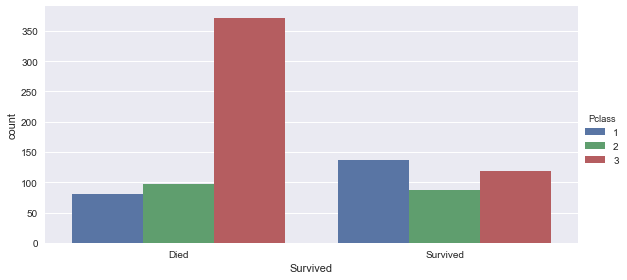

In [32]:
sns.factorplot('Survived',data=df, hue='Pclass', kind='count', aspect=2, order=survived_map.keys()).set_xticklabels(survived_map.values())

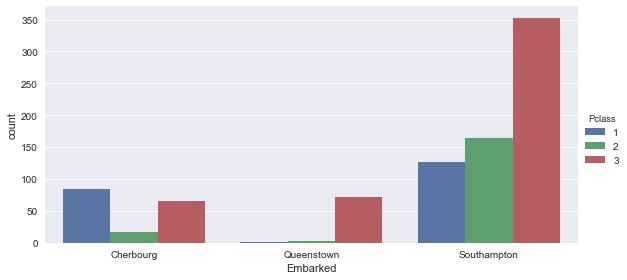

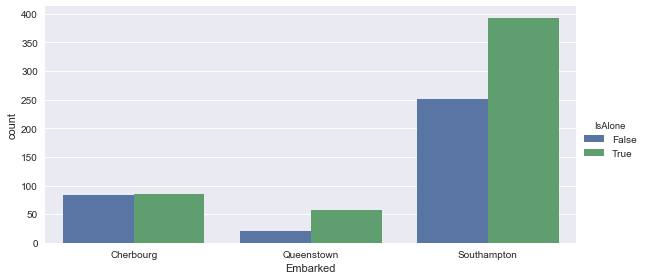

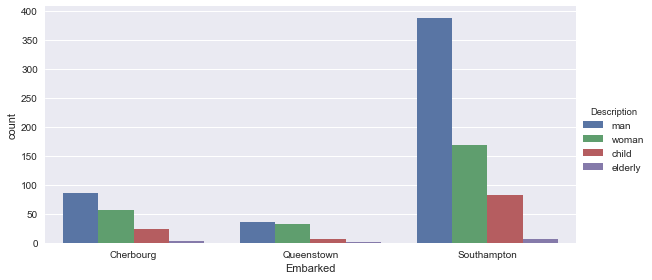

In [33]:
sns.factorplot('Embarked',data=df, hue='Pclass', kind='count', aspect=2, order=city_map.keys()).set_xticklabels(city_map.values())

sns.factorplot('Embarked',data=df, hue='IsAlone', kind='count', aspect=2, order=city_map.keys()).set_xticklabels(city_map.values())

sns.factorplot('Embarked',data=df, hue='Description', kind='count', aspect=2, order=city_map.keys()).set_xticklabels(city_map.values())

(-1.1094163053945212,
 1.1004483955675162,
 -1.1076522180822792,
 1.1207179856984884)

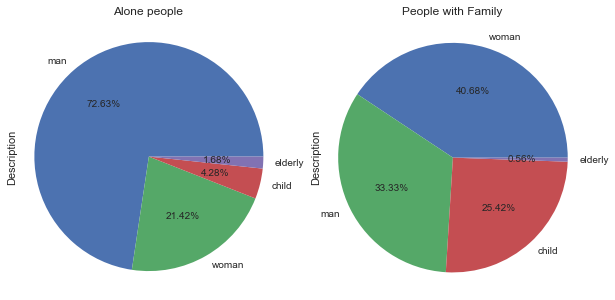

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

df[df.IsAlone].Description.value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax1, title='Alone people')
ax1.axis('equal')
df[~df.IsAlone].Description.value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax2, title='People with Family')
ax2.axis('equal')

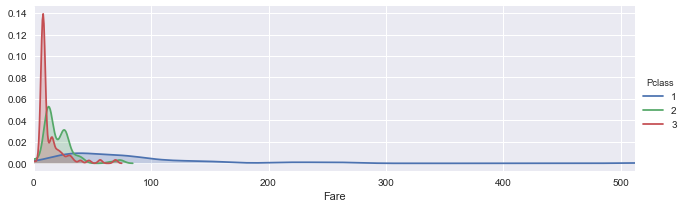

In [35]:
def plot_line_graph(x, hue):
    fig = sns.FacetGrid(df, hue=hue, aspect=3)
    fig.map(sns.kdeplot, x, shade=True)
    fig.set(xlim=(0, df[x].max()))
    fig.add_legend()
    return fig

plot_line_graph('Fare', 'Pclass')

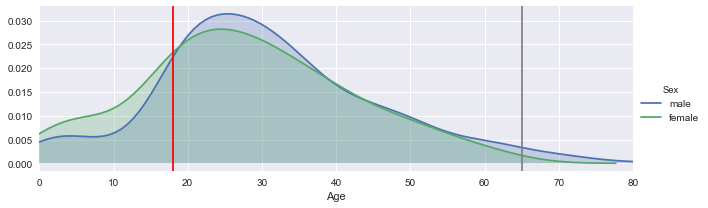

In [36]:
fig = plot_line_graph('Age', 'Sex')
fig.ax.axvline(18, color='r')
fig.ax.axvline(65, color='gray')

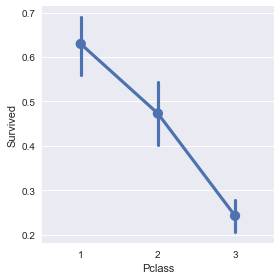

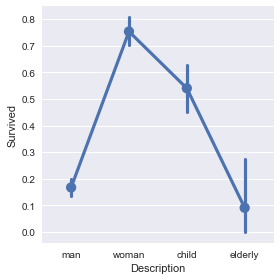

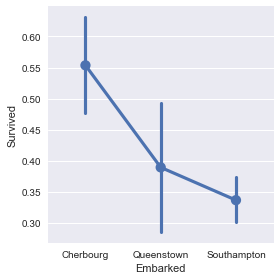

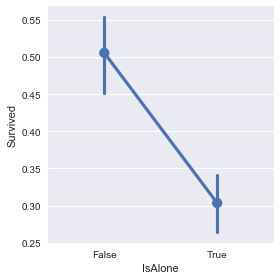

In [37]:
sns.factorplot('Pclass', 'Survived', data=df)
sns.factorplot('Description', 'Survived', data=df)
sns.factorplot('Embarked', 'Survived', data=df, order=city_map.keys()).set_xticklabels(city_map.values())
sns.factorplot('IsAlone', 'Survived', data=df)